In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [4]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 56s 0us/step


In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [14]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

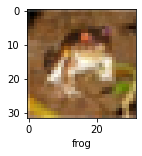

In [15]:
plot_sample(X_train, Y_train, 0)

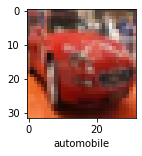

In [16]:
plot_sample(X_train, Y_train, 5)

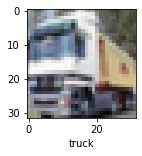

In [17]:
plot_sample(X_train, Y_train, 1)

# Normalizing

In [19]:
X_train = X_train/255
X_test = X_test/255

# Training on ANN

In [20]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

# Compiling the model

In [22]:
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

# Training the model

In [23]:
ann.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.8083 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.6207 - accuracy: 0.4288
Epoch 3/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5398 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4816 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4316 - accuracy: 0.4950


# Evaluating the model

In [24]:
ann.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.4370 - accuracy: 0.4895


[1.4369663000106812, 0.4894999861717224]

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = ann.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print('Classification Report: \n', classification_report(Y_test, Y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.47      0.53      1000
           1       0.58      0.64      0.61      1000
           2       0.41      0.24      0.30      1000
           3       0.38      0.28      0.32      1000
           4       0.41      0.48      0.44      1000
           5       0.46      0.30      0.37      1000
           6       0.39      0.73      0.51      1000
           7       0.66      0.45      0.53      1000
           8       0.56      0.69      0.62      1000
           9       0.50      0.62      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



# Training on CNN

In [29]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [30]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [31]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4617 - accuracy: 0.4792
Epoch 2/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1058 - accuracy: 0.6120
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9845 - accuracy: 0.6567
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9059 - accuracy: 0.6848
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8457 - accuracy: 0.7064
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7882 - accuracy: 0.7244
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7390 - accuracy: 0.7422
Epoch 8/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6985 - accuracy: 0.7562
Epoch 9/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.6586 - accuracy: 0.7713
Epoch 10/10
1563/1563 [==============================] - 43s 27m

In [32]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9707 - accuracy: 0.6771


[0.9706978797912598, 0.6771000027656555]

In [33]:
Y_test = Y_test.reshape(-1,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

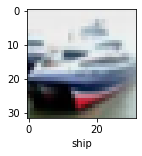

In [40]:
plot_sample(X_test, Y_test, 1)

In [42]:
Y_pred = cnn.predict(X_test)
Y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[2.3865142e-04, 2.0400659e-04, 8.2237395e-03, 9.2151642e-01,
        2.0749222e-03, 3.6024913e-02, 4.0193349e-03, 1.6170510e-03,
        2.6013952e-02, 6.6943794e-05],
       [1.9348263e-03, 7.4534258e-03, 3.4186855e-06, 4.0482897e-05,
        5.0051790e-06, 4.1901453e-07, 2.6703835e-06, 6.0089673e-07,
        9.9036282e-01, 1.9629428e-04],
       [5.6389659e-03, 4.5444801e-01, 6.7272322e-04, 1.1784837e-02,
        1.6375082e-03, 4.0749433e-03, 3.0533815e-04, 1.0257682e-02,
        8.0002412e-02, 4.3117750e-01],
       [6.2554091e-01, 1.1029413e-02, 4.6243459e-02, 4.8126083e-02,
        1.1426500e-01, 5.4887342e-03, 3.1551037e-02, 1.4006641e-03,
        8.1233226e-02, 3.5121486e-02],
       [6.9839216e-06, 7.4451978e-05, 3.1718180e-02, 1.0888158e-01,
        4.0666172e-01, 1.1560488e-03, 4.5142856e-01, 4.9975730e-05,
        2.1982392e-05, 5.3181691e-07]], dtype=float32)

In [44]:
np.argmax(Y_pred[1])

8

Predicted as ship.


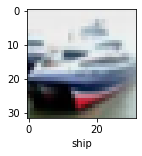

In [46]:
plot_sample(X_test, Y_test, 1)
print("Predicted as {}.".format(classes[np.argmax(Y_pred[1])]))

In [47]:
Y_classes = [np.argmax(i) for i in Y_pred]

In [49]:
Y_classes[0:5]

[3, 8, 1, 0, 6]


In [53]:
Y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

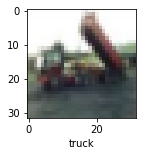

In [55]:
plot_sample(X_train, Y_train, 2)

In [57]:
classes[Y_classes[2]]

'automobile'

In [58]:
print('Classification Report: \n', classification_report(Y_test, Y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.69      0.73      1000
           1       0.90      0.68      0.78      1000
           2       0.53      0.66      0.59      1000
           3       0.47      0.53      0.50      1000
           4       0.72      0.50      0.59      1000
           5       0.54      0.63      0.58      1000
           6       0.80      0.71      0.76      1000
           7       0.71      0.76      0.73      1000
           8       0.83      0.76      0.79      1000
           9       0.67      0.86      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000

